## Identify the maximum epochs given an fixed learning rate
In this experiments we are trying to find the maximum number of epochs for the experiments. 
Then we fixed the parameters: 
* learning rate - 0.0001
* batch size - 256
* architecture - 100 -> 256 -> 100
* activation function - softmax 
* Same train and validation sets

In [1]:
import sys 
sys.path.append('../')
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 


base_dir = '../data/fashion'
print(os.listdir(base_dir))

['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']


/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from utils import mnist_reader, dataset_helper
X, y = mnist_reader.load_mnist('../data/fashion', kind='train')

In [3]:
X = X.copy() / 255.

Given the dtypes, there is no possibility of negative values in the dataset. 

In [4]:
X.shape, y.shape

((60000, 784), (60000,))

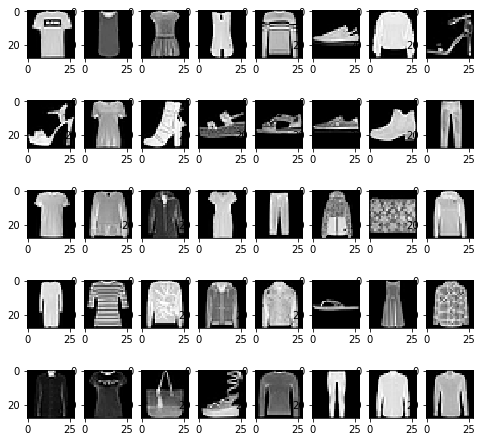

In [5]:
import numpy as np
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 8
rows = 5

for i in range(1, columns*rows +1):
    img = X[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()


In [6]:
nclasses =10
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42)    
y_train = dataset_helper.one_hot_encode(y_train, nclasses)
y_val = dataset_helper.one_hot_encode(y_val, nclasses)

In [7]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

## 100 Epochs

In [8]:
lr = 0.0001
b_sz = 256
eps = np.finfo(np.float64).eps
nfeatures  = X_train.shape[1]
epoch_sz = X_train.shape[0]
max_iter = 100 * (epoch_sz // b_sz) 
print_interval = 1 * (epoch_sz // b_sz) 

In [9]:

reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 256, 'sigmoid',  label="H1")
h2 = network.Layer(256, 100, 'sigmoid',  label="H2")
o1 = network.Layer(100, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)


Model Summary
-------------------------------
H1      (input=784, neurons=256, activation=sigmoid)
H2      (input=256, neurons=100, activation=sigmoid)
soft    (input=100, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 187 Batch: 187 Epoch 0 Train Loss: 0.31540609 lr: 0.000100 Val Loss: 0.30678782 Val Acc 0.45300000
It: 374 Batch: 186 Epoch 1 Train Loss: 0.29422290 lr: 0.000100 Val Loss: 0.27948017 Val Acc 0.59800000
It: 561 Batch: 185 Epoch 2 Train Loss: 0.26191176 lr: 0.000100 Val Loss: 0.24477822 Val Acc 0.60891667
It: 748 Batch: 184 Epoch 3 Train Loss: 0.23005908 lr: 0.000100 Val Loss: 0.21740611 Val Acc 0.65191667
It: 935 Batch: 183 Epoch 4 Train Loss: 0.20663690 lr: 0.000100 Val Loss: 0.19791993 Val Acc 0.67608333
It: 1122 Batch: 182 Epoch 5 Train Loss: 0.18978795 lr: 0.000100 Val Loss: 0.18322160 Val Acc 0.68691667
It: 1309 Batch: 181 Epoch 6 Train Loss: 0.17631459 lr: 0.000100 Val Loss: 0.17131008 Val Acc 0.70391667
It: 1496 Batch: 180 Epoch 7 Tra

It: 14399 Batch: 111 Epoch 76 Train Loss: 0.07919123 lr: 0.000100 Val Loss: 0.08077637 Val Acc 0.83466667
It: 14586 Batch: 110 Epoch 77 Train Loss: 0.07892963 lr: 0.000100 Val Loss: 0.08064939 Val Acc 0.83533333
It: 14773 Batch: 109 Epoch 78 Train Loss: 0.07831041 lr: 0.000100 Val Loss: 0.08027516 Val Acc 0.83583333
It: 14960 Batch: 108 Epoch 79 Train Loss: 0.07882267 lr: 0.000100 Val Loss: 0.08014440 Val Acc 0.83716667
It: 15147 Batch: 107 Epoch 80 Train Loss: 0.07792954 lr: 0.000100 Val Loss: 0.07996210 Val Acc 0.83750000
It: 15334 Batch: 106 Epoch 81 Train Loss: 0.07804189 lr: 0.000100 Val Loss: 0.07975296 Val Acc 0.83775000
It: 15521 Batch: 105 Epoch 82 Train Loss: 0.07763722 lr: 0.000100 Val Loss: 0.07955715 Val Acc 0.83683333
It: 15708 Batch: 104 Epoch 83 Train Loss: 0.07790022 lr: 0.000100 Val Loss: 0.07933141 Val Acc 0.83891667
It: 15895 Batch: 103 Epoch 84 Train Loss: 0.07743217 lr: 0.000100 Val Loss: 0.07916702 Val Acc 0.83891667
It: 16082 Batch: 102 Epoch 85 Train Loss: 0.07

Validation Stats...
Accuracy: 0.844
Precision: 0.843
Recall: 0.844
F1 Score: 0.843349
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


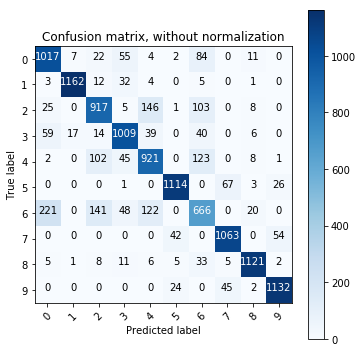

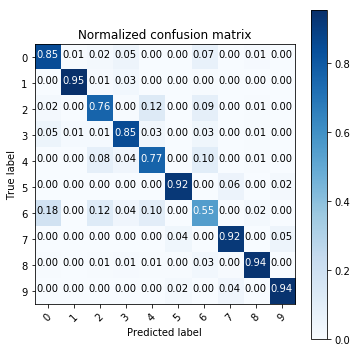

In [10]:
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)

## 200 Epochs

In [11]:
lr = 0.0001
b_sz = 256
eps = np.finfo(np.float64).eps
nfeatures  = X_train.shape[1]
epoch_sz = X_train.shape[0]
max_iter = 200 * (epoch_sz // b_sz) 
print_interval = 10 * (epoch_sz // b_sz) 

import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 256, 'sigmoid',  label="H1")
h2 = network.Layer(256, 100, 'sigmoid',  label="H2")
o1 = network.Layer(100, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)


Model Summary
-------------------------------
H1      (input=784, neurons=256, activation=sigmoid)
H2      (input=256, neurons=100, activation=sigmoid)
soft    (input=100, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.21586055 lr: 0.000100 Val Loss: 0.14616955 Val Acc 0.72975000
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.12403165 lr: 0.000100 Val Loss: 0.11231215 Val Acc 0.76325000
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.10452524 lr: 0.000100 Val Loss: 0.10061191 Val Acc 0.79175000
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.09516488 lr: 0.000100 Val Loss: 0.09329839 Val Acc 0.80825000
It: 9350 Batch: 138 Epoch 49 Train Loss: 0.08907467 lr: 0.000100 Val Loss: 0.08825874 Val Acc 0.81791667
It: 11220 Batch: 128 Epoch 59 Train Loss: 0.08473208 lr: 0.000100 Val Loss: 0.08454294 Val Acc 0.82675000
It: 13090 Batch: 118 Epoch 69 Train Loss: 0.08148380 lr: 0.000100 Val Loss: 0.08182571 Val Acc 0.83058333
It: 14960 Batch: 1

Validation Stats...
Accuracy: 0.860
Precision: 0.860
Recall: 0.861
F1 Score: 0.860176
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


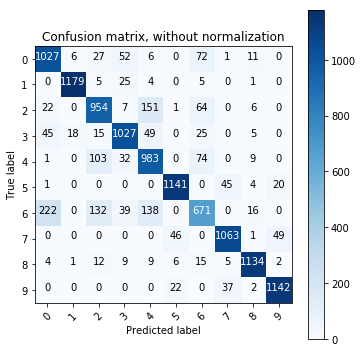

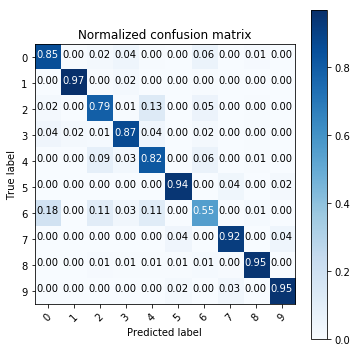

In [12]:
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)

## 300 Epochs

In [13]:
lr = 0.0001
b_sz = 256
eps = np.finfo(np.float64).eps
nfeatures  = X_train.shape[1]
epoch_sz = X_train.shape[0]
max_iter = 300 * (epoch_sz // b_sz) 
print_interval = 10 * (epoch_sz // b_sz) 

import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 256, 'sigmoid',  label="H1")
h2 = network.Layer(256, 100, 'sigmoid',  label="H2")
o1 = network.Layer(100, nclasses, 'softmax', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)


Model Summary
-------------------------------
H1      (input=784, neurons=256, activation=sigmoid)
H2      (input=256, neurons=100, activation=sigmoid)
soft    (input=100, neurons=10, activation=softmax)
-------------------------------

Shuffled
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.21392067 lr: 0.000100 Val Loss: 0.14815289 Val Acc 0.71916667
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.12611005 lr: 0.000100 Val Loss: 0.11406108 Val Acc 0.76008333
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.10584925 lr: 0.000100 Val Loss: 0.10164950 Val Acc 0.78741667
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.09607588 lr: 0.000100 Val Loss: 0.09388838 Val Acc 0.80491667
It: 9350 Batch: 138 Epoch 49 Train Loss: 0.08958076 lr: 0.000100 Val Loss: 0.08868333 Val Acc 0.81741667
It: 11220 Batch: 128 Epoch 59 Train Loss: 0.08510443 lr: 0.000100 Val Loss: 0.08489014 Val Acc 0.82575000
It: 13090 Batch: 118 Epoch 69 Train Loss: 0.08163206 lr: 0.000100 Val Loss: 0.08202778 Val Acc 0.83133333
It: 14960 Batch: 1

Validation Stats...
Accuracy: 0.872
Precision: 0.871
Recall: 0.872
F1 Score: 0.871912
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


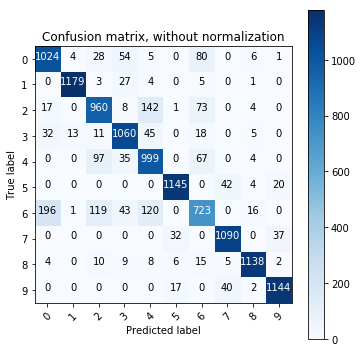

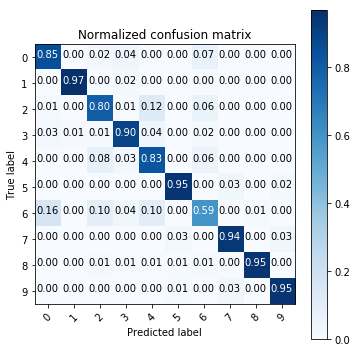

In [14]:
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)

## Conclusion

200 epochs seems to be sufficient for the algorithm to converge given the learning rate